⭕ **Taxi Fare Prediction**

In [127]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import seaborn as sns
from random import randrange, uniform

In [2]:
from google.colab import files
uploaded=files.upload()

Saving TaxiFare.csv to TaxiFare.csv


In [7]:
Train_Data=(pd.read_csv(r'TaxiFare.csv',nrows=500000,
header = 0 )).drop(columns=["date_time_of_pickup",'unique_id'])

In [8]:
Train_Data.head()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1


In [11]:
Train_Data.columns

Index(['amount', 'longitude_of_pickup', 'latitude_of_pickup',
       'longitude_of_dropoff', 'latitude_of_dropoff', 'no_of_passenger'],
      dtype='object')

In [14]:
Train_Data['amount']= Train_Data['amount'].apply(pd.to_numeric,errors='coerce')
Train_Data['amount']= Train_Data['amount'].replace({0:np.nan})
Train_Data['no_of_passenger']=Train_Data['no_of_passenger'].fillna(0)
Train_Data['no_of_passenger']= Train_Data['no_of_passenger'].astype(int)
Train_Data['no_of_passenger']=Train_Data['no_of_passenger'].replace({0:np.nan})
Train_Data['longitude_of_pickup']= Train_Data['longitude_of_pickup'].replace({0:np.nan})
Train_Data['latitude_of_pickup']= Train_Data['latitude_of_pickup'].replace({0:np.nan})
Train_Data['longitude_of_dropoff']=Train_Data['longitude_of_dropoff'].replace({0:np.nan})
Train_Data['latitude_of_dropoff']= Train_Data['latitude_of_dropoff'].replace({0:np.nan})

In [16]:
Train_Data=Train_Data[np.logical_and(Train_Data['longitude_of_pickup'] !=Train_Data['longitude_of_dropoff'],
Train_Data['latitude_of_pickup'] !=Train_Data['latitude_of_dropoff'])]

In [17]:
Train_Data.head()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1.0


In [18]:
Train_Data.shape

(49440, 6)

In [19]:
sns.set(style='darkgrid',palette='Set1')

<ipython-input-22-b48df130bcea>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  _ = sns.distplot(Train_Data['amount'],bins=50)
<ipython-input-22-b48df130bcea>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  _ = sns.distplot(Train_Data['longitude_of_pickup'],bins=50)
<ipython-input-22-b48df130bcea>:7: UserWarning: 

`di

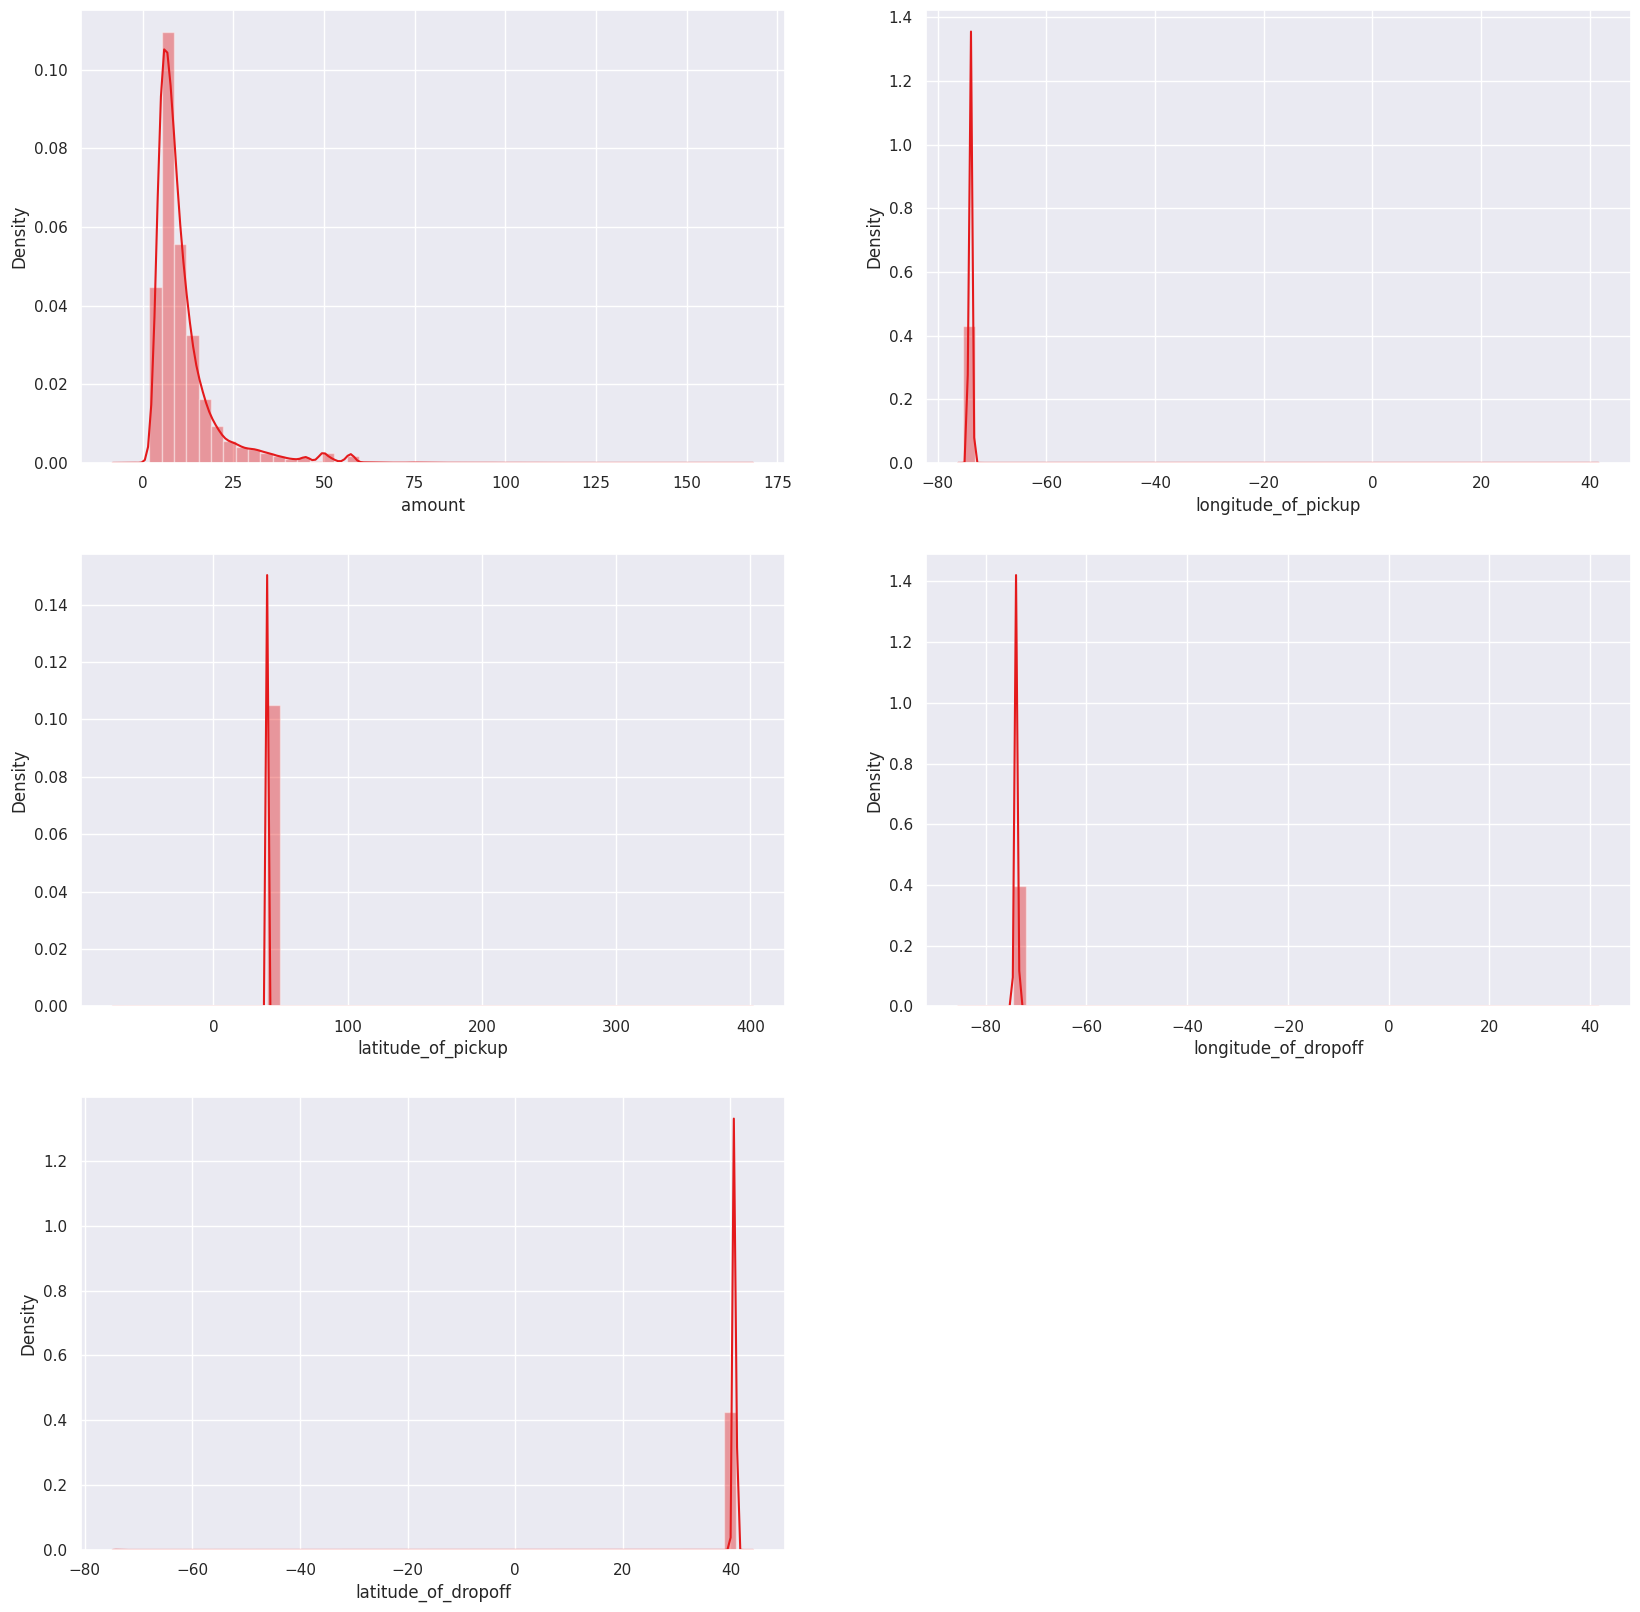

In [22]:
plt.figure(figsize=(20,20))
plt.subplot(321)
_ = sns.distplot(Train_Data['amount'],bins=50)
plt.subplot(322)
_ = sns.distplot(Train_Data['longitude_of_pickup'],bins=50)
plt.subplot(323)
_ = sns.distplot(Train_Data['latitude_of_pickup'],bins=50)
plt.subplot(324)
_ = sns.distplot(Train_Data['longitude_of_dropoff'],bins=50)
plt.subplot(325)
_ = sns.distplot(Train_Data['latitude_of_dropoff'],bins=50)
plt.show()

In [32]:
# # Missing Value Analysis
Train_Data.isnull().sum()


amount                    3
longitude_of_pickup     955
latitude_of_pickup      955
longitude_of_dropoff    957
latitude_of_dropoff     955
no_of_passenger         164
dtype: int64

In [23]:
#calculate missing values
missing_val = pd.DataFrame(Train_Data.isnull().sum())
print(missing_val)

                        0
amount                  3
longitude_of_pickup   955
latitude_of_pickup    955
longitude_of_dropoff  957
latitude_of_dropoff   955
no_of_passenger       164


In [25]:
#Reset index
missing_val = missing_val.reset_index()
print(missing_val)

   level_0                 index    0
0        0                amount    3
1        1   longitude_of_pickup  955
2        2    latitude_of_pickup  955
3        3  longitude_of_dropoff  957
4        4   latitude_of_dropoff  955
5        5       no_of_passenger  164


In [26]:
#Rename variable
missing_val = missing_val.rename(columns = {'index': 'Variables', 0: 'count'})
print(missing_val)

   level_0             Variables  count
0        0                amount      3
1        1   longitude_of_pickup    955
2        2    latitude_of_pickup    955
3        3  longitude_of_dropoff    957
4        4   latitude_of_dropoff    955
5        5       no_of_passenger    164


In [27]:
#Calculate percentage
missing_val['Missing_percentage'] = (missing_val['count']/len(Train_Data)*100)
print(missing_val)

   level_0             Variables  count  Missing_percentage
0        0                amount      3            0.006068
1        1   longitude_of_pickup    955            1.931634
2        2    latitude_of_pickup    955            1.931634
3        3  longitude_of_dropoff    957            1.935680
4        4   latitude_of_dropoff    955            1.931634
5        5       no_of_passenger    164            0.331715


In [28]:
#sort in descending order
missing_val = missing_val.sort_values('Missing_percentage', ascending =
False).reset_index(drop = True)
print(missing_val)

   level_0             Variables  count  Missing_percentage
0        3  longitude_of_dropoff    957            1.935680
1        1   longitude_of_pickup    955            1.931634
2        2    latitude_of_pickup    955            1.931634
3        4   latitude_of_dropoff    955            1.931634
4        5       no_of_passenger    164            0.331715
5        0                amount      3            0.006068


In [29]:
Train_Data.describe()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
count,49437.000000,48485.000000,48485.000000,48483.000000,48485.000000,49276.000000
mean,11.359619,-73.921349,40.710844,-73.920623,40.703102,1.674690
std,9.539791,2.414527,2.817201,2.408556,2.301413,1.289329
min,-5.000000,-75.423848,-74.006893,-84.654241,-74.006377,1.000000
25%,6.000000,-73.992315,40.736492,-73.991333,40.735863,1.000000
50%,8.500000,-73.982132,40.753428,-73.980498,40.754122,1.000000
75%,12.500000,-73.968476,40.767768,-73.965427,40.768515,2.000000
max,165.000000,40.783472,401.083332,40.851027,43.415190,6.000000


In [ ]:
# # Missing Value Imputation

In [36]:
#As it is found Mean is very close to original method we will proceed with
## imputation via mean
Train_Data['amount'] = Train_Data['amount'].fillna(Train_Data['amount'].mean())
Train_Data['longitude_of_pickup']=Train_Data['longitude_of_pickup'].fillna(Train_Data['longitude_of_pickup'].mean())
Train_Data['latitude_of_pickup']=Train_Data['latitude_of_pickup'].fillna(Train_Data['latitude_of_pickup'].mean())
Train_Data['longitude_of_dropoff']=Train_Data['longitude_of_dropoff'].fillna(Train_Data['longitude_of_dropoff'].mean())
Train_Data['latitude_of_dropoff']=Train_Data['latitude_of_dropoff'].fillna(Train_Data['latitude_of_dropoff'].mean())
#And for category variables imputation is done with mode
Train_Data['no_of_passenger'] =Train_Data['no_of_passenger'].fillna(int(Train_Data['no_of_passenger'].mode()))

In [37]:
Train_Data.head()


,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1.0


In [38]:
Train_Data.isnull()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
49994,False,False,False,False,False,False
49995,False,False,False,False,False,False
49996,False,False,False,False,False,False
49997,False,False,False,False,False,False


In [39]:
Train_Data.isnull().sum()

amount                  0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dtype: int64

In [40]:
#Imputing the NAs in target variables may hamper the model, so it is preferred to remove NA rows of the data
Train_Data=Train_Data.dropna()

In [41]:
#convert into proper data type
convert_dic={'amount' : 'float','no_of_passenger': 'int'}
Train_Data=Train_Data.astype(convert_dic)

In [42]:
Train_Data.shape

(49440, 6)

In [ ]:
# # Outlier Analysis

In [43]:
#save the data with in another place with different name
df = Train_Data.copy()

In [44]:
Train_Data = Train_Data.copy()


In [45]:
# irregular fare_amount are converted to NA
Train_Data.loc[Train_Data['amount']<0 , 'amount']=np.nan
Train_Data.loc[Train_Data['amount'] > 30, 'amount']=np.nan
Train_Data=Train_Data.dropna()

In [46]:
#irregular passenger counts or those wgich are greater then 8 convertet to NaN
Train_Data.loc[Train_Data['no_of_passenger'] > 8,'no_of_passenger'] = np.nan

In [48]:
#save numeric data names
coutliers = [ 'longitude_of_pickup', 'latitude_of_pickup', 'longitude_of_dropoff',
'latitude_of_dropoff']
for list in coutliers:
#Detect and replace with NA
#Extract quartiles
  q75, q25 = np.percentile(Train_Data[list], [75 ,25])

In [49]:
#Calculate IQR
iqr = q75 - q25

In [50]:
# #Calculate inner and outer fence
minimum = q25 - (iqr*1.5)
maximum = q75 + (iqr*1.5)

In [51]:
# #Replace with NA
Train_Data.loc[Train_Data[list] < minimum,list] = np.nan
Train_Data.loc[Train_Data[list] > maximum,list] = np.nan


In [52]:
# #Calculate missing value
missing_val = pd.DataFrame(Train_Data.isnull().sum())

In [54]:
#As Mean is the best method, we impute missing values/ in this case outlier values with mean
Train_Data['longitude_of_pickup'] =Train_Data['longitude_of_pickup'].fillna(Train_Data['longitude_of_pickup'].mean())
Train_Data['latitude_of_pickup'] =Train_Data['latitude_of_pickup'].fillna(Train_Data['latitude_of_pickup'].mean())
Train_Data['longitude_of_dropoff'] =Train_Data['longitude_of_dropoff'].fillna(Train_Data['longitude_of_dropoff'].mean())
Train_Data['latitude_of_dropoff'] =Train_Data['latitude_of_dropoff'].fillna(Train_Data['latitude_of_dropoff'].mean())

In [56]:
#imputed with mode for categorical variables
Train_Data['no_of_passenger'] =Train_Data['no_of_passenger'].fillna(int(Train_Data['no_of_passenger'].mode()))

In [57]:
#convert the data type of categorical variable passenger count
Train_Data['no_of_passenger']=Train_Data['no_of_passenger'].astype('int')
Train_Data['no_of_passenger']=Train_Data['no_of_passenger'].astype('category')

In [ ]:
# # Feature Selection

In [ ]:
#haversine function

In [62]:
def haversine(lat1, lon1, lat2, lon2, to_radians=True, earth_radius=6371):
  if to_radians:
    lat1, lon1, lat2, lon2 = np.radians([lat1, lon1, lat2, lon2])
    a = np.sin((lat2-lat1)/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin((lon2-lon1)/2.0)**2
    return earth_radius * 2 * np.arcsin(np.sqrt(a))

In [64]:
Train_Data['dist'] = haversine( Train_Data['latitude_of_pickup'],
Train_Data['longitude_of_pickup'],
Train_Data['latitude_of_dropoff'], Train_Data['longitude_of_dropoff'])

In [65]:
##Correlation analysis
#Correlation plot
numeric=['amount','longitude_of_pickup','latitude_of_pickup','longitude_of_dropoff','latitude_of_dropoff', 'dist']
Train_Data_corr = Train_Data.loc[:,numeric]


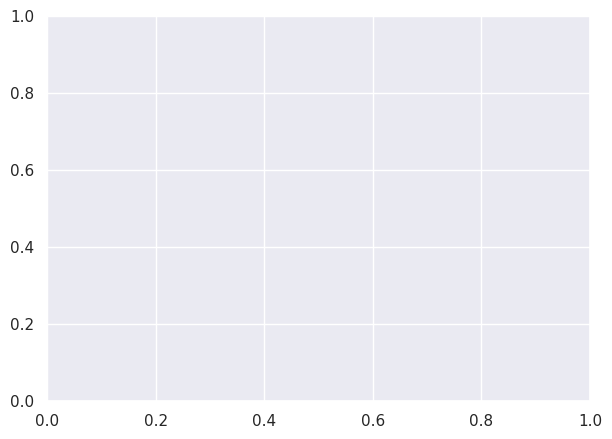

In [66]:
#Set the width and hieght of the plot
f, ax = plt.subplots(figsize=(7, 5))

In [67]:
#Generate correlation matrix
corr = Train_Data_corr.corr()
print(corr)


                        amount  longitude_of_pickup  latitude_of_pickup  \
amount                1.000000             0.013295           -0.012812   
longitude_of_pickup   0.013295             1.000000           -0.757678   
latitude_of_pickup   -0.012812            -0.757678            1.000000   
longitude_of_dropoff  0.013758             0.917824           -0.759799   
latitude_of_dropoff  -0.078798            -0.002485            0.007215   
dist                  0.017173             0.967770           -0.761374   

                      longitude_of_dropoff  latitude_of_dropoff      dist  
amount                            0.013758            -0.078798  0.017173  
longitude_of_pickup               0.917824            -0.002485  0.967770  
latitude_of_pickup               -0.759799             0.007215 -0.761374  
longitude_of_dropoff              1.000000             0.002359  0.965858  
latitude_of_dropoff               0.002359             1.000000 -0.002912  
dist              

In [68]:
#Plotted using seaborn library
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool),
cmap=sns.diverging_palette(220, 10, as_cmap=True),
square=True, ax=ax)

<ipython-input-68-87d0551f1819>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool),


<Axes: >

In [ ]:
#eliminate all data with the pickup and drop location points as same

In [70]:
Train_Data=Train_Data[np.logical_and(Train_Data['longitude_of_pickup'] !=Train_Data['longitude_of_dropoff'],
Train_Data['latitude_of_pickup'] !=Train_Data['latitude_of_dropoff'])]

In [ ]:
# # Model Development

In [71]:
# # Random Forest
#Random Forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [72]:
# Divide the data into train and test
train1, test1 = train_test_split(Train_Data, test_size=0.2)

In [73]:
RF_model = RandomForestRegressor(n_estimators = 100).fit(train1.iloc[:, 1:7],
train1.iloc[:,0])

In [74]:
RF_model

RandomForestRegressor()

In [75]:
RF_Predictions = RF_model.predict(test1.iloc[:, 1:7])

In [77]:
#Calculate MAPE
def MAPE(y_true, y_pred):
  mape = np.mean(np.abs((y_true - y_pred) / y_true))*100
  return mape

In [78]:
MAPE(test1.iloc[:,0], RF_Predictions)

20.64069751897136

In [ ]:
#Error 21.826
#Accuracy 78.174

In [ ]:
# # Linear Regression


In [80]:
#Combine all the values in one array
values=['amount', 'longitude_of_pickup','latitude_of_pickup', 'longitude_of_dropoff',
'latitude_of_dropoff', 'dist']

In [81]:
linear_Data = Train_Data[values]


In [ ]:
#This function is developed to get columns for specific passenger count. The idea is developed from R linear regression fit,
#which explains all the passenger count individualy contributes in the model

In [82]:
cat_names = ['no_of_passenger']
for i in cat_names:
  temp = pd.get_dummies(Train_Data[i], prefix= i)
  linear_Data = linear_Data.join(temp)

In [83]:
linear_Data.shape

(46901, 12)

In [84]:
linear_Data.head()


,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,dist,no_of_passenger_1,no_of_passenger_2,no_of_passenger_3,no_of_passenger_4,no_of_passenger_5,no_of_passenger_6
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1.030764,1,0,0,0,0,0
1,16.9,-74.016048,40.711303,-73.979268,40.782004,8.450134,1,0,0,0,0,0
2,5.7,-73.982738,40.761270,-73.991242,40.750562,1.389525,0,1,0,0,0,0
3,7.7,-73.987130,40.733143,-73.991567,40.758092,2.799270,1,0,0,0,0,0
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1.999157,1,0,0,0,0,0


In [85]:
#Spliting the newly created data set with passenger count dummies
train1, test1 = train_test_split(linear_Data, test_size=0.2)

In [86]:
#Import libraries for LR
import statsmodels.api as sm
# Train the model using the training sets
model = sm.OLS(train1.iloc[:, 0].astype(float), train1.iloc[:, 1:12].astype(float)).fit()

In [87]:
# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 amount   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     31.41
Date:                Sat, 29 Jul 2023   Prob (F-statistic):           2.95e-61
Time:                        15:00:37   Log-Likelihood:            -1.1501e+05
No. Observations:               37520   AIC:                         2.300e+05
Df Residuals:                   37509   BIC:                         2.301e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
longitude_of_pickup     -0.3198      0.067     -4.793      0.000      -0.451      -0.189
latitude_of_pickup       0.1962      0.066      2.993      0.003       0.068       0.325
longitude_of_dropoff     0.0107      0.066      0.161      0.872      -0.119       0.141
latitude_of_dropoff    -17.0728      1.130    -15.110      0.000     -19.287     -14.858
dist                     0.0049      0.001      5.998      0.000       0.003       0.006
no_of_passenger_1      674.4316     46.739     14.430      0.000     582.822     766.041
no_of_passenger_2      674.5651     46.739     14.433      0.000     582.955     766.175
no_of_passenger_3      674.6276     46.739     14.434      0.000     583.018     766.237
no_of_passenger_4      674.4285     46.740     14.430      0.000     582.818     766.039
no_of_passenger_5      674.3945     46.739     14.429      0.000     582.785     766.004
no_of_passenger_6      675.4147     46.739     14.451      0.000     583.805     767.024
==============================================================================
Omnibus:                     9446.335   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            20697.348
Skew:                           1.461   Prob(JB):                         0.00
Kurtosis:                       5.169   Cond. No.                     1.10e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.1e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [88]:
# make the predictions by the model
predictions_LR = model.predict(test1.iloc[:,1:12])

In [89]:
#Calculate MAPE
MAPE(test1.iloc[:,0], predictions_LR)


48.83407519080871

In [ ]:
#Error 28.174474283418512
#Accuracy 71.8255

In [102]:
from sklearn.tree import DecisionTreeRegressor

In [106]:
# Divide the data into train and test
train1, test1 = train_test_split(Train_Data, test_size=0.2)

In [108]:
DT_model = DecisionTreeRegressor().fit(train1.iloc[:, 1:7],
train1.iloc[:,0])

In [109]:
DT_model

DecisionTreeRegressor()

In [110]:
DT_Predictions = DT_model.predict(test1.iloc[:, 1:7])

In [111]:
#Calculate MAPE
def MAPE(y_true, y_pred):
  mape = np.mean(np.abs((y_true - y_pred) / y_true))*100
  return mape

In [112]:
MAPE(test1.iloc[:,0], DT_Predictions)

27.089887850381533

In [ ]:
# Erro 27.089887850381533
# Accuracy 72.9101121

In [114]:
from sklearn.ensemble import GradientBoostingRegressor

In [115]:
# Divide the data into train and test
train1, test1 = train_test_split(Train_Data, test_size=0.2)

In [116]:
BR_model = GradientBoostingRegressor().fit(train1.iloc[:, 1:7],
train1.iloc[:,0])

In [117]:
BR_model

GradientBoostingRegressor()

In [118]:
BR_Predictions = DT_model.predict(test1.iloc[:, 1:7])

In [119]:
MAPE(test1.iloc[:,0], BR_Predictions)

5.9543201096237715

In [ ]:
# Error 5.9543201096237715
# Accuracy 94.0456799

In [120]:
from sklearn.ensemble import BaggingRegressor

In [121]:
# Divide the data into train and test
train1, test1 = train_test_split(Train_Data, test_size=0.2)

In [122]:
BG_model = BaggingRegressor().fit(train1.iloc[:, 1:7],
train1.iloc[:,0])

In [123]:
BG_model

BaggingRegressor()

In [125]:
BG_Predictions = BG_model.predict(test1.iloc[:, 1:7])

In [126]:
MAPE(test1.iloc[:,0], BG_Predictions)

21.587012628525173

In [ ]:
# Error 21.587012628525173
# Accuracy 78.4129874